In [1]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ratio import get_ratio
from IPython.display import Image, display
from matplotlib import pyplot as plt

(1620, 2160, 3)
(604, 1620, 3)


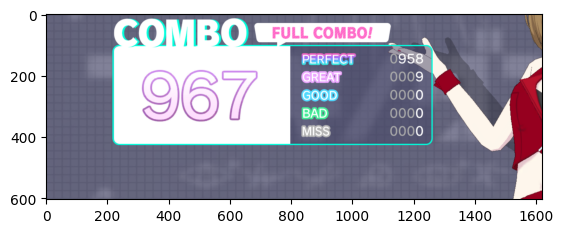

In [2]:
full_img = cv2.imread('../targets/normal.png')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

print(full_img.shape)

full_img = full_img[
  full_img.shape[0] // 2 : full_img.shape[0] // 8 * 7,
  0 : full_img.shape[1] // 4 * 3
]

print(full_img.shape)

plt.imshow(full_img)

(407, 270, 3)
1
(407, 270, 3)


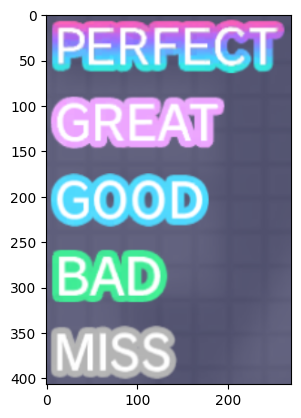

In [3]:
face_img = cv2.imread('./img2.png')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

print(face_img.shape)

if full_img.shape[0] <= face_img.shape[0]:
  ratio = 1 - (face_img.shape[0] - full_img.shape[0]) / face_img.shape[0]
else:
  ratio = 1

print(ratio)

face_img = cv2.resize(face_img, None, None, ratio, ratio)

print(face_img.shape)

plt.imshow(face_img)

In [4]:
search_target_ratio = get_ratio(search_content=face_img, search_target=full_img)['search_target']

full_img = cv2.resize(full_img, None, None, search_target_ratio, search_target_ratio)

(10, 1134, 3)


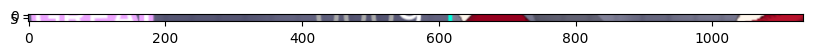

In [5]:
param = "TM_CCOEFF_NORMED"

fig = plt.figure(figsize=(10, 10))

result = cv2.matchTemplate(full_img, face_img, getattr(cv2, param))
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

tl = maxLoc
br = (tl[0] + face_img.shape[1], tl[1] + face_img.shape[0])

dst = full_img.copy()

dst = dst[
  tl[1] + face_img.shape[0] // 10 * 3 - 5 : tl[1] + face_img.shape[0] // 10 * 3 + 5,
  tl[0] : dst.shape[1]
]

plt.imshow(dst)
print(dst.shape)

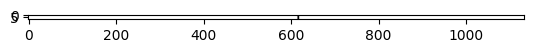

In [6]:
np_dst = np.full((dst.shape[0], dst.shape[1]), 0)
color_range = 25

for y in range(dst.shape[0]):
  for x in range(dst.shape[1]):
    r, g, b = dst[y][x]

    if r==0 and g==255 and b==221:
        a = 0
    elif 114-color_range < r < 144+color_range and 241-color_range < g < 241+color_range and 219-color_range < b < 219+color_range:
        a = 0
    elif 108-color_range < r < 108+color_range and 193-color_range < g < 193+color_range and 190-color_range < b < 190+color_range:
        a = 0
    elif 115-color_range < r < 115+color_range and 233-color_range < g < 233+color_range and 215-color_range < b < 215+color_range:
        a = 0
    else:
        a = 255
    
    np_dst[y][x] = a

plt.imshow(np_dst, cmap='gray')

In [7]:
for x in range(np_dst.shape[1]):
  b = False
  for y in range(np_dst.shape[0]):
    if np_dst[y][x] == 0:
      b = True
    else:
      b = False
      break
  if b:
    print(x)

616
617
618
619
